In [ ]:
pip install wordcloud matplotlib


In [ ]:
!apt-get install fonts-dejavu


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra
The following NEW packages will be installed:
  fonts-dejavu fonts-dejavu-core fonts-dejavu-extra
0 upgraded, 3 newly installed, 0 to remove and 30 not upgraded.
Need to get 3,085 kB of archives.
After this operation, 10.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-core all 2.37-2build1 [1,041 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-dejavu-extra all 2.37-2build1 [2,041 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-dejavu all 2.37-2build1 [3,192 B]
Fetched 3,085 kB in 0s (10.7 MB/s)
Selecting previously unselected package fonts-dejavu-core.
(Reading database ... 126315 files and directories currently installed.)
Preparing to unpack .../fonts-dejavu-core_2.37-2build1_all.deb ...
Unpacki

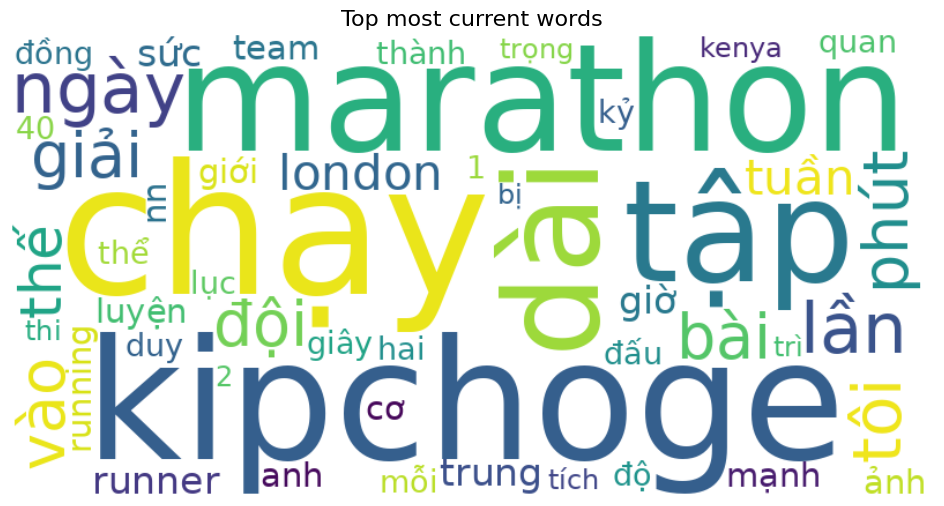

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
from collections import Counter

STOP_WORDS = set([
    'và', 'là', 'thì', 'của', 'trong', 'một', 'những', 'được', 'với', 'cho',
    'khi', 'vì', 'lúc', 'từ', 'đến', 'các', 'như', 'đã', 'này', 'đó', 'nên',
    'để', 'rằng', 'ở', 'có', 'không', 'rất', 'vẫn', 'cũng', 'vừa', 'nhiều',
    'trên', 'bằng', 'sau', 'trước', 'ra', 'nào', 'nơi', 'tại',

    'and', 'is', 'in', 'the', 'to', 'of', 'for', 'with', 'on', 'a', 'an',
    'by', 'this', 'that', 'it', 'as', 'from', 'at', 'be', 'are', 'was',
    'were', 'has', 'have', 'had', 'but', 'or', 'so', 'if', 'not', 'also'
])

def read_and_clean_text(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read().lower()
    words = re.findall(r'\b\w+\b', text)
    meaningful_words = [word for word in words if word not in STOP_WORDS]
    return meaningful_words

def generate_word_cloud(file_path, top_n=50):
    words = read_and_clean_text(file_path)
    word_counts = Counter(words)
    most_common_words = dict(word_counts.most_common(top_n))
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          font_path='/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf'
                          ).generate_from_frequencies(most_common_words)

    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Top most current words', fontsize=16)
    plt.show()


file_path = '/content/Kipchoge chuẩn bị thế nào trước Lon.txt'
generate_word_cloud(file_path)
